# Predictive Analytics: Apple Quality Classification

# Deskripsi Proyek

# Latar Belakang Proyek Klasifikasi Kualitas Apel dengan Machine Learning


# 1. Import Library
Mengimpor library yang akan digunakan dalam pembuatan proyek ini

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings("ignore", category=FutureWarning)

!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Data Understanding
Data Understanding adalah tahap untuk memahami dataset secara mendalam.

# Data Loading
Data loading adalah tahap memuat dataset ke dalam program agar dapat digunakan untuk proses analisis atau pemodelan.

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

{}

In [3]:
# Mengunduh Dataset dari Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nelgiriyewithana/apple-quality
!unzip apple-quality.zip

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 481MB/s]
Archive:  apple-quality.zip
  inflating: apple_quality.csv       


In [2]:
# Membaca Data dari File CSV
apel = pd.read_csv('/content/apple_quality.csv')

# Exploratory Data Analysis (EDA)
Exploratory data analysis adalah tahap awal untuk memahami data, menemukan pola, serta mendeteksi anomali menggunakan statistik dan visualisasi.

* EDA - Deskripsi Variabel


In [3]:
apel

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00,-3.97,-2.51,5.35,-1.01,1.84,0.33,-0.491590483,good
1,1.00,-1.20,-2.84,3.66,1.59,0.85,0.87,-0.722809367,good
2,2.00,-0.29,-1.35,-1.74,-0.34,2.84,-0.04,2.621636473,bad
3,3.00,-0.66,-2.27,1.32,-0.10,3.64,-3.41,0.790723217,good
4,4.00,1.36,-1.30,-0.38,-0.55,3.03,-1.30,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.00,-0.29,1.95,-0.20,-0.64,0.02,-1.09,1.854235285,good
3997,3997.00,-2.63,-2.14,-2.44,0.66,2.20,4.76,-1.334611391,bad
3998,3998.00,-4.01,-1.78,2.37,-0.20,2.16,0.21,-2.229719806,good
3999,3999.00,0.28,-1.72,0.12,-1.15,1.27,-0.78,1.599796456,good


* Dataset berisi 4001 baris (rows), yang masing-masing mewakili satu sampel atau data apel.

* Terdapat 9 kolom (columns) yaitu fitur dan label sebagai berikut:

  - A_id : ID unik setiap data apel.
  - Size : Ukuran apel (angka sudah dinormalisasi atau distandarisasi).
  - Weight : Berat apel.
  - Sweetness : Tingkat kemanisan apel.
  - Crunchiness : Tingkat kerenyahan apel.
  - Juiciness : Tingkat kejuiciness/apel berair.
  - Ripeness : Tingkat kematangan apel.
  - Acidity : Tingkat keasaman apel.
  - Quality : Kualitas apel dalam kategori good atau bad.

In [4]:
apel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Dari kode di atas dapat disimpulkan bahwa:

- Dataset memiliki 7 kolom dengan tipe data float64, yaitu A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, dan Ripeness, serta 2 kolom dengan tipe data object, yaitu Acidity dan Quality.

- Kolom A_id akan dihapus (drop) karena tidak akan digunakan dalam proyek ini.

- Kolom Acidity yang awalnya bertipe object akan dikonversi menjadi tipe data float64 agar sesuai dengan jenis data numerik lainnya.

In [5]:
# Ringkasan Statistik Deskriptif Data Numerik
apel.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,1999.50,-0.50,-0.99,-0.47,0.99,0.51,0.50
std,1154.84,1.93,1.60,1.94,1.40,1.93,1.87
min,0.00,-7.15,-7.15,-6.89,-6.06,-5.96,-5.86
25%,999.75,-1.82,-2.01,-1.74,0.06,-0.80,-0.77
50%,1999.50,-0.51,-0.98,-0.50,1.00,0.53,0.50
75%,2999.25,0.81,0.03,0.80,1.89,1.84,1.77
max,3999.00,6.41,5.79,6.37,7.62,7.36,7.24


Dari data di atas dapat disimpulkan:

- count menunjukkan jumlah data valid, yaitu 4000 per kolom.

- mean adalah rata-rata nilai tiap kolom, dengan nilai sekitar nol, menunjukkan data mungkin sudah distandarisasi.

- std menggambarkan sebaran data di sekitar rata-rata.

- min dan max menunjukkan rentang nilai terkecil dan terbesar.

- 25% (Q1), 50% (median), dan 75% (Q3) menunjukkan distribusi data dalam persentil.

In [6]:
apel.shape

(4001, 9)

dataset tersebut memiliki 4001 baris data dan 9 kolom fitur

* EDA - Menangani Missing Value dan Outliers

In [7]:
# melihat jumlah duplikat data
apel.duplicated().sum()

np.int64(0)

jika dilihat dari output yang dihasilkan dapat disimpulkan bahwa tidak terdapat data yang terduplikat

In [8]:
# melihat jumlah missing value
apel.isnull().sum()

,0
A_id,1
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


Setelah dilakukan pengecekan, dapat disimpulkan bahwa setiap kolom memiliki 1 nilai yang hilang (missing value), kecuali kolom Acidity yang tidak memiliki missing value.

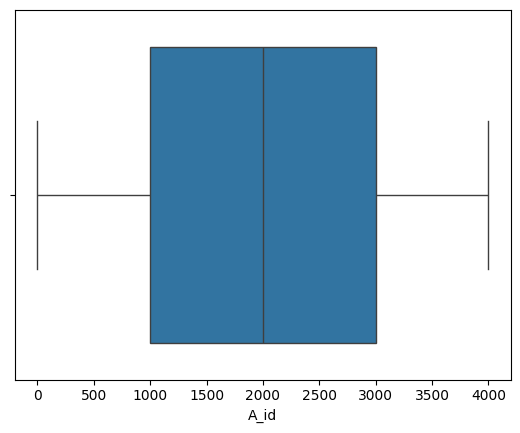

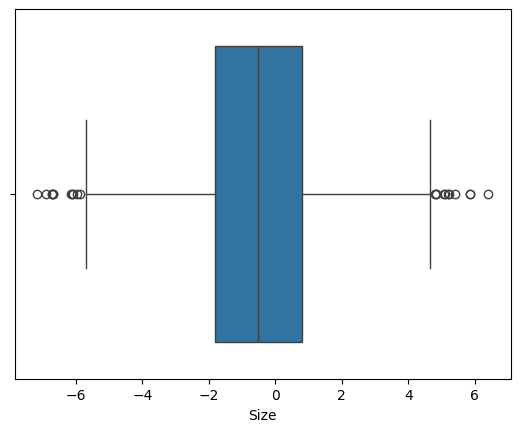

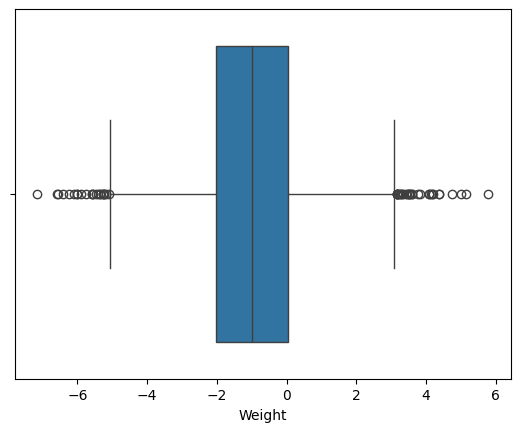

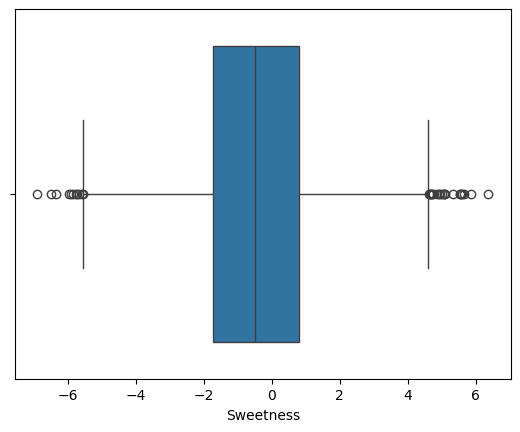

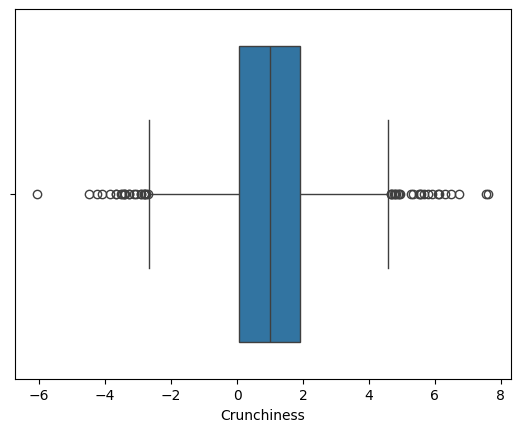

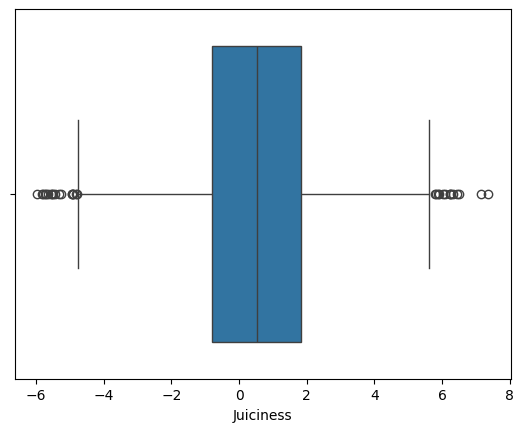

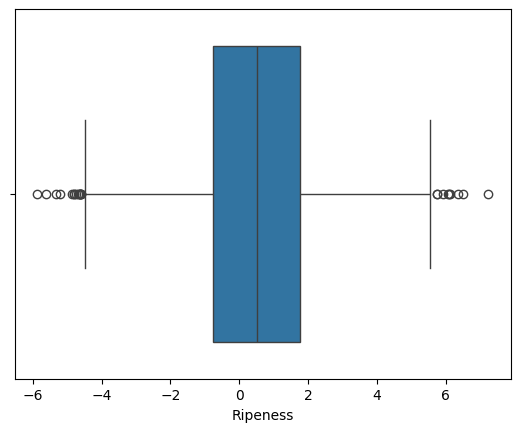

In [9]:
# deteksi outliers
apel_outlier=apel.select_dtypes(exclude=['object'])
for column in apel_outlier:
        plt.figure()
        sns.boxplot(data=apel_outlier, x=column)

* EDA - Univariate Analysis

adalah nalisis data dengan fokus pada satu variabel saja untuk memahami distribusi, pola, dan karakteristiknya.
Biasanya dilakukan dengan menggunakan statistik deskriptif dan visualisasi seperti histogram, boxplot, atau bar chart.

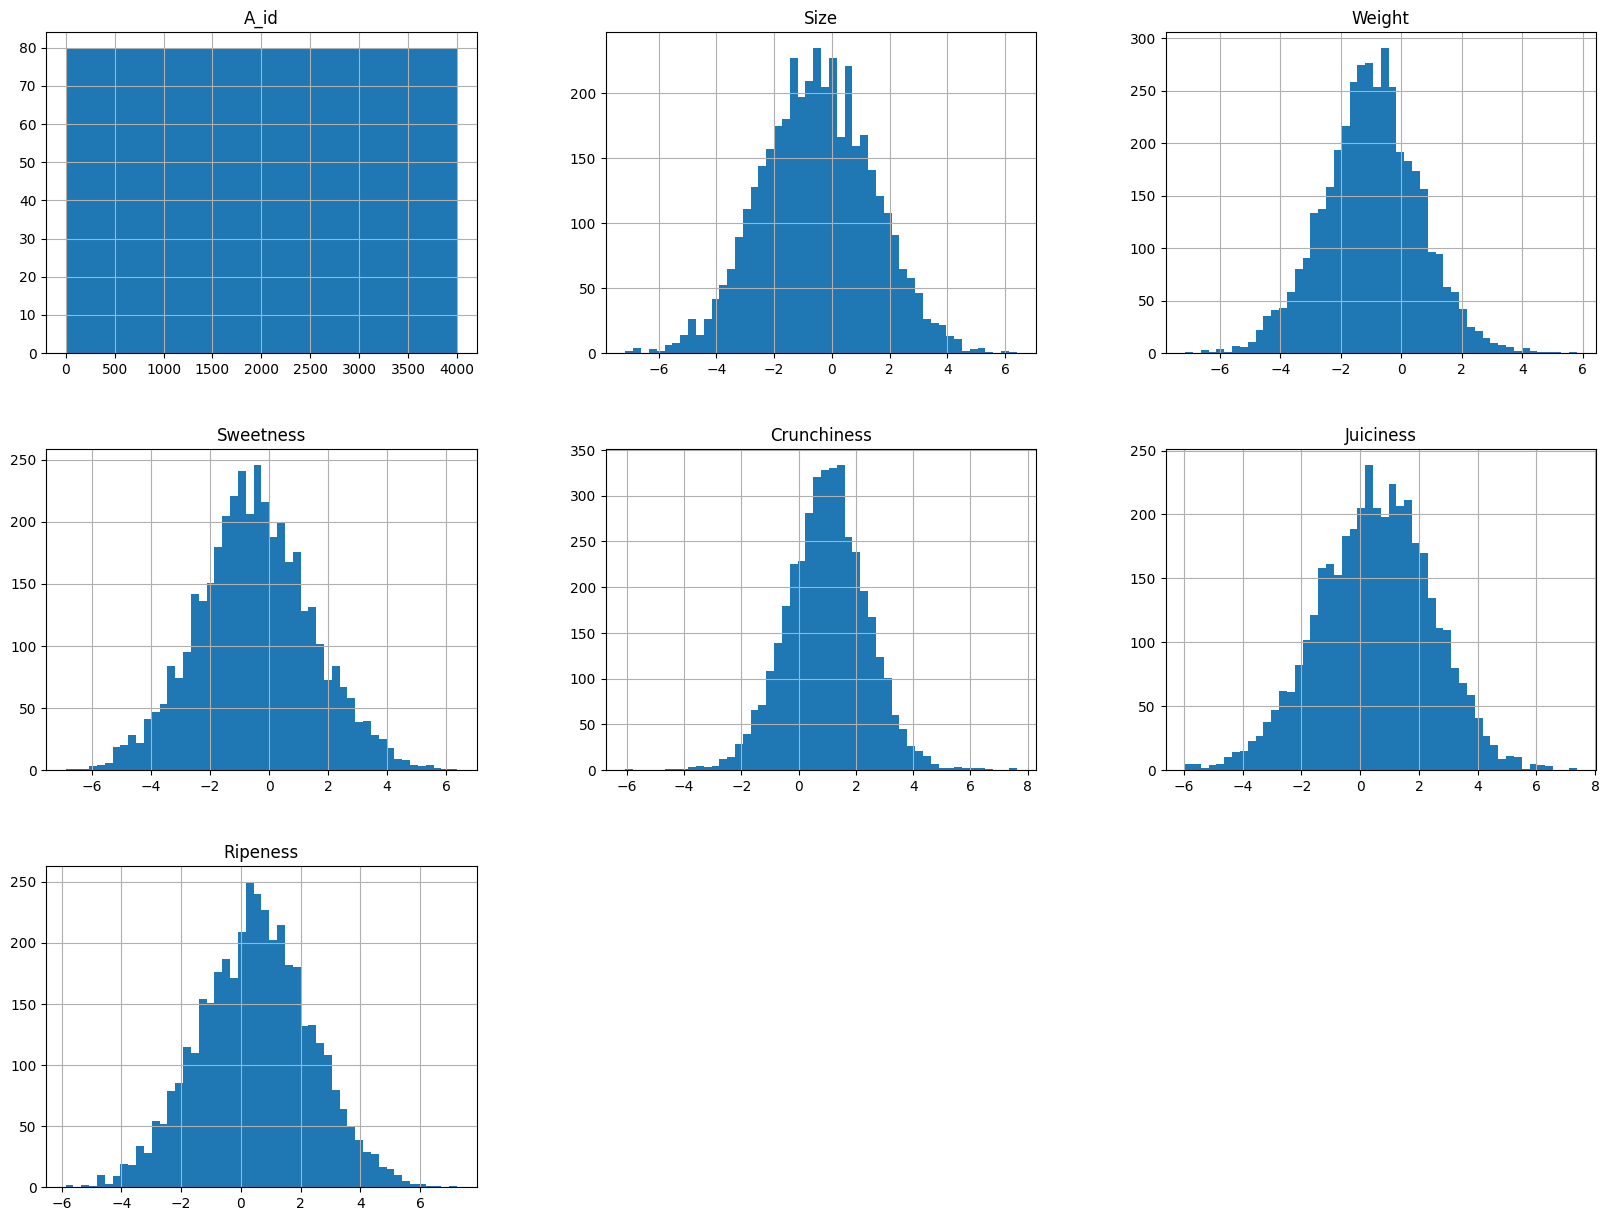

In [10]:
# Membuat histogram untuk melihat sebaran nilai pada setiap fitur numerik dalam dataset apel
apel.hist(bins=50, figsize=(20,15))
plt.show()

- EDA - Multivariate Analysis

adalah analisis data yang melibatkan dua atau lebih variabel sekaligus untuk melihat hubungan, korelasi, atau pola antar fitur.
Biasanya menggunakan visualisasi seperti scatter plot, heatmap korelasi, atau pairplot.

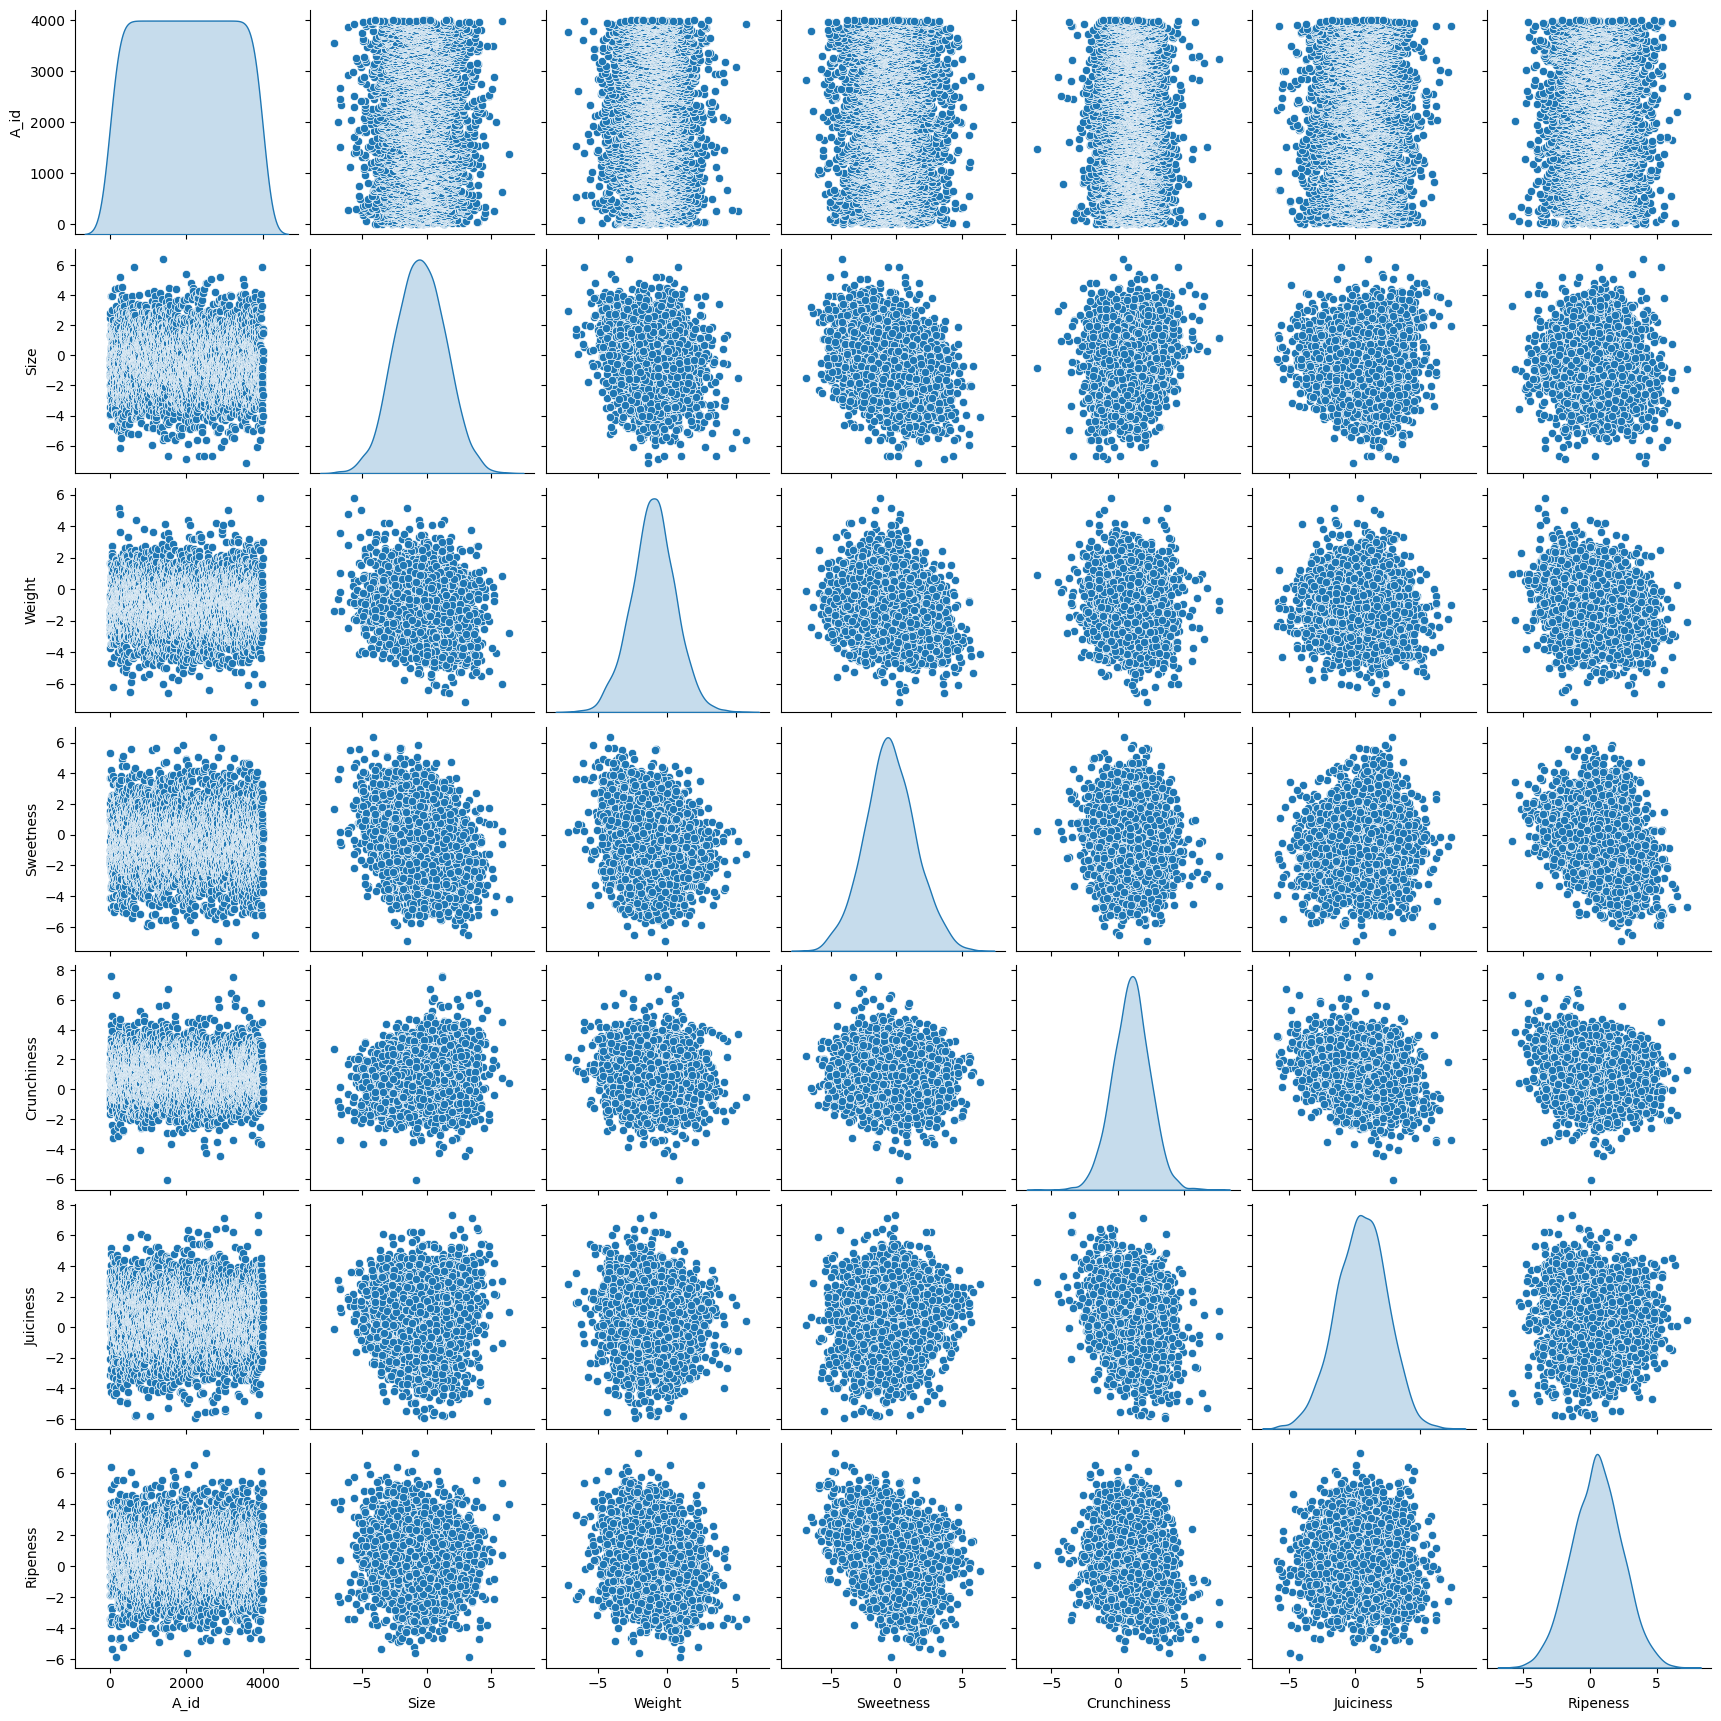

In [11]:
# Visualisasi Hubungan Antar Variabel dengan Pairplot
sns.pairplot(apel, diag_kind = 'kde')

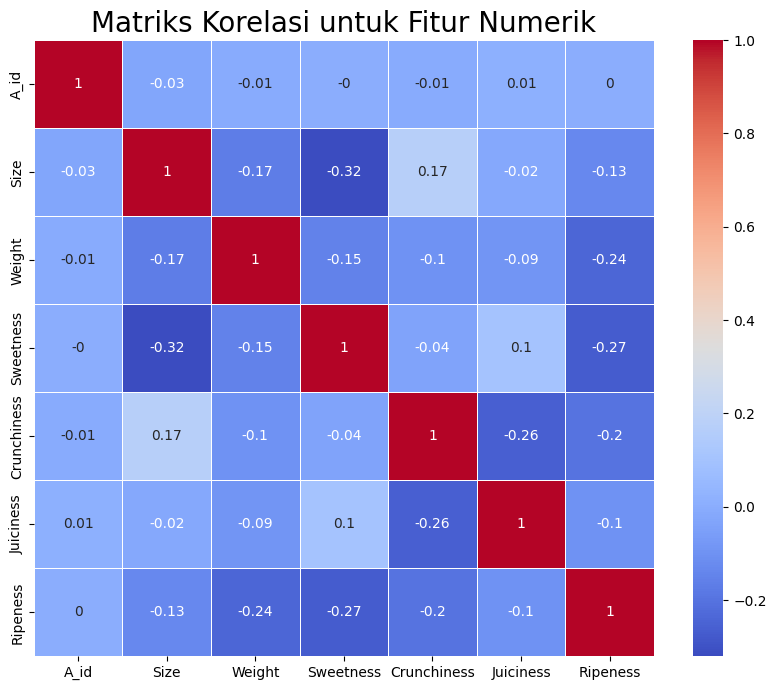

In [12]:
# Visualisasi Matriks Korelasi dengan Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = apel.select_dtypes(include=['number']).corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik", size=20)
plt.show()

# 3. Data Preparation
Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

# Data Cleaning

# 1. Menghapus kolom

In [3]:
# drop kolom
apel.drop("A_id",axis=1,inplace=True)

kolom A_id dihapus dari DataFrame karena kolom tersebut tidak akan digunakan dalam proyek ini.
Kolom ini kemungkinan hanya berisi ID atau penanda unik yang tidak memiliki pengaruh terhadap proses analisis atau pemodelan, sehingga dihilangkan untuk menyederhanakan data.

# 2. Menangani missing value

In [4]:
# membersihkan data dari missing value
apel.dropna(inplace=True)
apel.isnull().sum().sum()

np.int64(0)

# 3. Mengubah tipe data

In [5]:
# mengubah tipe data
apel["Acidity"] = apel["Acidity"].astype("float64")

Kode itu mengubah tipe data kolom Acidity menjadi angka desimal (float64) supaya bisa diproses secara matematis.

In [6]:
apel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


# 4. Encoding Label Target

In [ ]:
# label encoding
apel["Quality"] = apel["Quality"].map({"bad":0, "good":1})

Kode ini dilakukan untuk mengubah data kategori pada kolom Quality menjadi angka (0 dan 1) agar bisa diproses oleh model machine learning.

In [7]:
apel.shape

(4000, 8)

# 5. Menangani Outlier

In [8]:
# menangani outlier dengan menggunakan metode IQR
apel_numeric = apel.select_dtypes(include=['number'])

Q1 = apel_numeric.quantile(0.25)
Q3 = apel_numeric.quantile(0.75)
IQR = Q3 - Q1

apel_clean = apel[~((apel_numeric < (Q1 - 1.5 * IQR)) | (apel_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

Kode ini menghapus data yang memiliki nilai ekstrem (outlier) dengan menggunakan metode IQR, yaitu membuang data yang berada di luar rentang normal antara kuartil pertama dan ketiga. Hal ini dilakukan supaya hasil analisis dan model menjadi lebih akurat dan stabil.

In [9]:
apel_clean.shape

(3790, 8)

# 6. Memisahkan fitur dan target

In [10]:
# Memisahkan Fitur dan Target Variabel
X = apel_clean.drop("Quality",axis=1)
y = apel_clean.Quality

Kode ini memisahkan data input (fitur) dan data output (target) supaya model tahu apa yang dipakai untuk belajar dan apa yang harus diprediksi.

# 7. Train-Test-Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = y_test.to_numpy()

print(f'Total datasets: {len(X)}')
print(f'Total data Latih: {len(X_train)}')
print(f'Total data Uji: {len(X_test)}')

Total datasets: 3790
Total data Latih: 3032
Total data Uji: 758


Kode ini membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian, lalu menampilkan jumlah data total, data latih, dan data uji.

# 8. Normalisasi

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

code diatas melakukan standardisasi data fitur supaya setiap kolom punya rata-rata 0 dan standar deviasi 1. Ini penting agar model machine learning bekerja lebih optimal dan tidak bias pada fitur dengan skala besar.

# 4. Model Development

# Lazy classifier

Lazy classifier adalah jenis algoritma pembelajaran mesin yang tidak melakukan proses pelatihan (training) secara eksplisit sebelum digunakan untuk prediksi. Dengan kata lain, algoritma ini tidak membangun model secara langsung dari data pelatihan, melainkan menyimpan data tersebut dan baru melakukan perhitungan atau komputasi saat menerima data baru untuk diklasifikasikan.

*  Kelebihan
1. Tidak Memerlukan Proses Pelatihan yang Intensif
2. Fleksibilitas dalam Penambahan Data Baru
3. Simpel dan Mudah Diimplementasikan

*  Kekurangan
1. Waktu Prediksi yang Relatif Lambat
2. Memerlukan Memori Besar
3. Rentan terhadap Noise dan Data Tidak Relevan
4. Tidak Melakukan Generalisasi Model Secara Eksplisit


In [13]:
# Membandingkan performa berbagai model klasifikasi secara otomatis dengan bantuan library LazyPredict.
clf = LazyClassifier()
models,predicts = clf.fit(X_train,X_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1489, number of negative: 1543
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3032, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491095 -> initscore=-0.035624
[LightGBM] [Info] Start training from score -0.035624
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.89               0.89     0.89      0.89   
ExtraTreesClassifier               0.89               0.89     0.89      0.89   
LGBMClassifier                     0.89               0.89     0.89      0.89   
SVC                                0.88               0.88     0.88      0.88   
LabelSpreading          

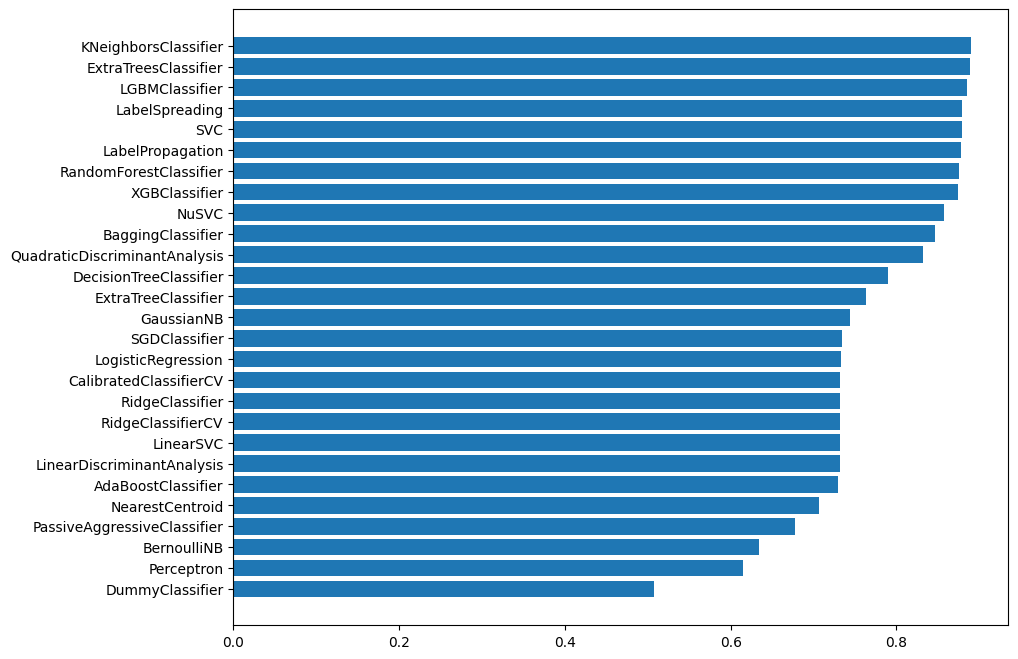

In [26]:
# Visualisasi akurasi model klasifikasi
temp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index,temp["Accuracy"])
plt.show()

In [29]:
# menyiapkan tabel evaluasi
models = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'],
                      columns=['KNN', 'ExtraTreesClassifier', 'LGBMClassifier', 'SVC', 'LabelSpreading'])

In [30]:
# Melatih model KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

models.loc['accuracy','KNN'] = accuracy_score(y_test, knn_pred)
models.loc['precision','KNN'] = precision_score(y_test, knn_pred, average='weighted')
models.loc['recall','KNN'] = recall_score(y_test, knn_pred, average='weighted')
models.loc['f1_score','KNN'] = f1_score(y_test, knn_pred, average='weighted')

In [31]:
# Melatih model ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, max_depth= 10, n_jobs= 2, random_state= 100)
etc.fit(X_train, y_train)
etc_pred = etc.predict(X_test)

models.loc['accuracy','ExtraTreesClassifier'] = accuracy_score(y_test, etc_pred)
models.loc['precision','ExtraTreesClassifier'] = precision_score(y_test, etc_pred, average='weighted')
models.loc['recall','ExtraTreesClassifier'] = recall_score(y_test, etc_pred, average='weighted')
models.loc['f1_score','ExtraTreesClassifier'] = f1_score(y_test, etc_pred, average='weighted')

In [32]:
# Melatih model LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100, max_depth= 10, n_jobs= 2, random_state= 100)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

models.loc['accuracy','LGBMClassifier'] = accuracy_score(y_test, lgbm_pred)
models.loc['precision','LGBMClassifier'] = precision_score(y_test, lgbm_pred, average='weighted')
models.loc['recall','LGBMClassifier'] = recall_score(y_test, lgbm_pred, average='weighted')
models.loc['f1_score','LGBMClassifier'] = f1_score(y_test, lgbm_pred, average='weighted')

[LightGBM] [Info] Number of positive: 1489, number of negative: 1543
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3032, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491095 -> initscore=-0.035624
[LightGBM] [Info] Start training from score -0.035624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [33]:
# Melatih model dengan SVC(Support Vector Classifier)
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

models.loc['accuracy','SVC'] = accuracy_score(y_test, svc_pred)
models.loc['precision','SVC'] = precision_score(y_test, svc_pred, average='weighted')
models.loc['recall','SVC'] = recall_score(y_test, svc_pred, average='weighted')
models.loc['f1_score','SVC'] = f1_score(y_test, svc_pred, average='weighted')

In [34]:
# Melatih Model Dengan LabelSpreading
lbs = LabelSpreading()
lbs.fit(X_train, y_train)
lbs_pred = lbs.predict(X_test)

models.loc['accuracy','LabelSpreading'] = accuracy_score(y_test, lbs_pred)
models.loc['precision','LabelSpreading'] = precision_score(y_test, lbs_pred, average='weighted')
models.loc['recall','LabelSpreading'] = recall_score(y_test, lbs_pred, average='weighted')
models.loc['f1_score','LabelSpreading'] = f1_score(y_test, lbs_pred, average='weighted')

# 5. Evaluasi Model

# Score Model

In [36]:
# Melihat akurasi model
print(models)

           KNN ExtraTreesClassifier LGBMClassifier  SVC LabelSpreading
accuracy  0.89                 0.85           0.88 0.88           0.88
precision 0.89                 0.85           0.88 0.88           0.88
recall    0.89                 0.85           0.88 0.88           0.88
f1_score  0.89                 0.85           0.88 0.88           0.88


Dari tabel diatas dapat disimpulkan bahwa:

- KNN memiliki nilai tertinggi di semua metrik, yaitu 0.89 (atau 89%), menandakan performa terbaik.

- ExtraTreesClassifier paling rendah, dengan nilai sekitar 0.85 (85%).

- Model lain (LGBMClassifier, SVC, LabelSpreading) berkisar di angka 0.88 (88%).

# Plot Model

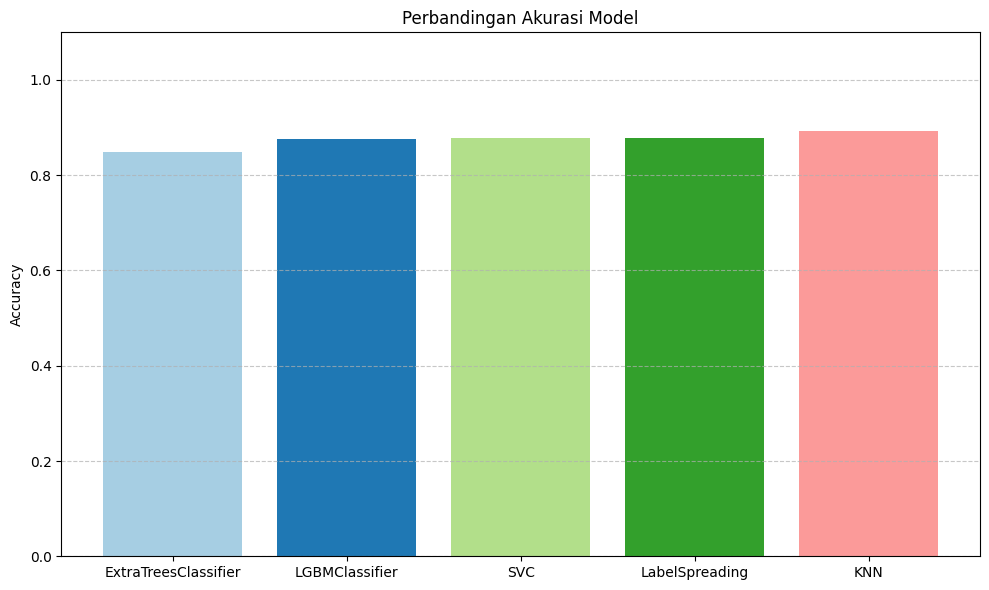

In [35]:
# Menampilkan grafik batang (bar chart) yang membandingkan akurasi beberapa model klasifikasi.
temp = models.loc['accuracy'].sort_values(ascending=True)
colors = plt.cm.Paired(range(len(temp)))

plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color=colors)
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()